In [1]:
import bccr
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec

import statsmodels.api as sm
from statsmodels.formula.api import ols


datos = bccr.SW(IMAE=35449, IPC=25482, M1=1445, Tbasica=423, func=np.mean, fillna='ffill').dropna()
datos.tail()

,IMAE,IPC,M1,Tbasica
fecha,,,,
2020-07,110.987099,106.127077,5.166828e+06,3.708065
2020-08,110.584336,106.122788,5.206881e+06,3.635484
2020-09,113.705524,106.411930,5.206211e+06,3.498333
2020-10,118.613059,106.496597,5.061595e+06,3.293548
2020-11,120.969090,106.498184,4.913216e+06,3.346667


In [2]:
res = ols('M1 ~ IMAE + IPC + Tbasica', data=np.log(datos)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.944e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:23:49   Log-Likelihood:                 335.36
No. Observations:                 359   AIC:                            -662.7
Df Residuals:                     355   BIC:                            -647.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3294      0.298     21.263      0.000       5.744       6.915
IMAE           1.0242      0.079     13.044      0.000       0.870       1.179
IPC            0.9268      0.028     33.508      0.000       0.872       0.981
Tbasica       -0.3519      0.022    -15.919      0.000      -0.395      -0.308
==============================================================================
Omnibus:                      115.244   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.868
Skew:                           1.349   Prob(JB):                    1.87e-101
Kurtosis:                       7.872   Cond. No.                         390.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

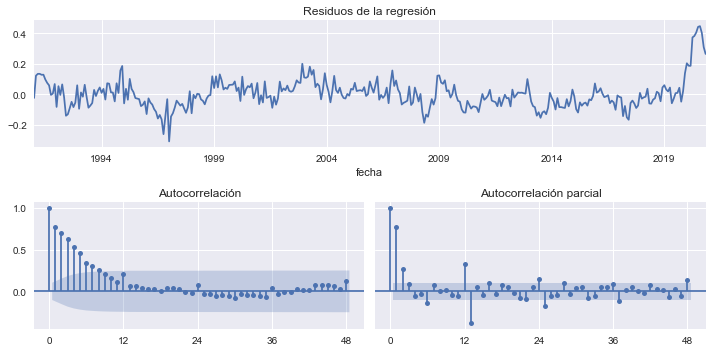

In [3]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(title='Residuos de la regresión', ax=ax)

OPCIONES = dict(lags=48, alpha=0.05, )
sm.graphics.tsa.plot_acf(res.resid, ax=axs0, title='Autocorrelación',**OPCIONES);
sm.graphics.tsa.plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial', **OPCIONES);
axs0.set_xticks([0,12,24,36,48])
axs1.set_xticks([0,12,24,36,48]);